# Final Project - Group 5

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from google.colab import files
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import chi2, chi2_contingency
from sklearn.metrics import classification_report

In [2]:
import warnings

warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [4]:
df = pd.read_csv("ObesityDataSet.csv")

## Understanding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.shape

(2111, 17)

In [7]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [8]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


## EDA

In [10]:
numeric_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

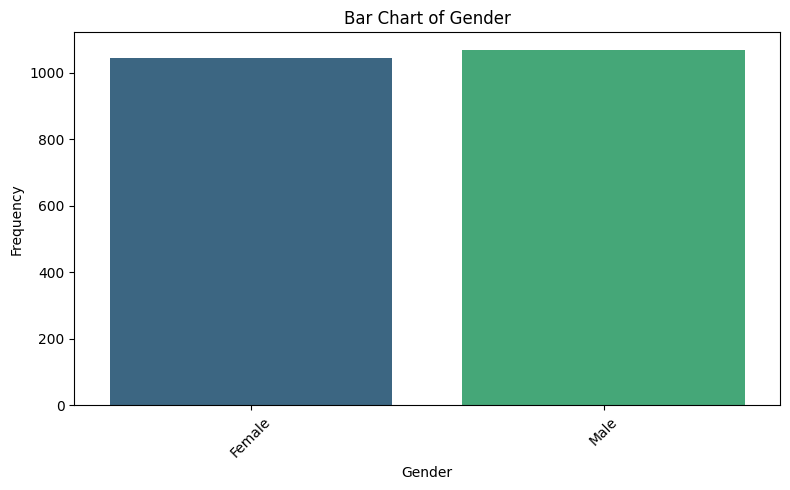

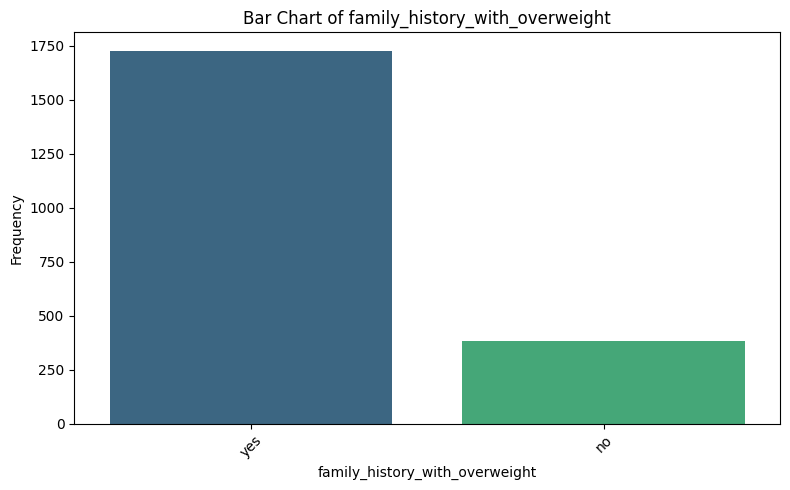

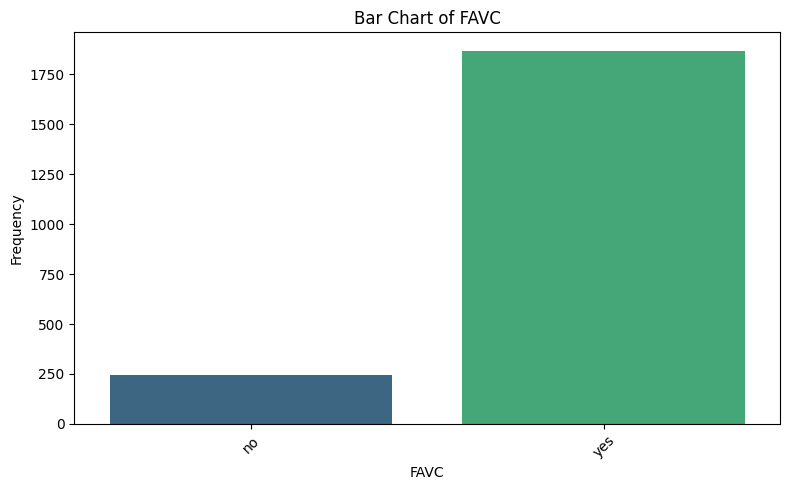

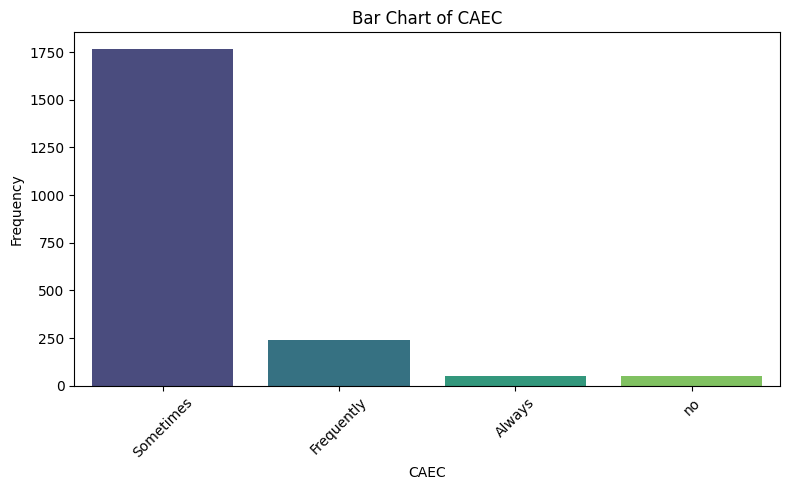

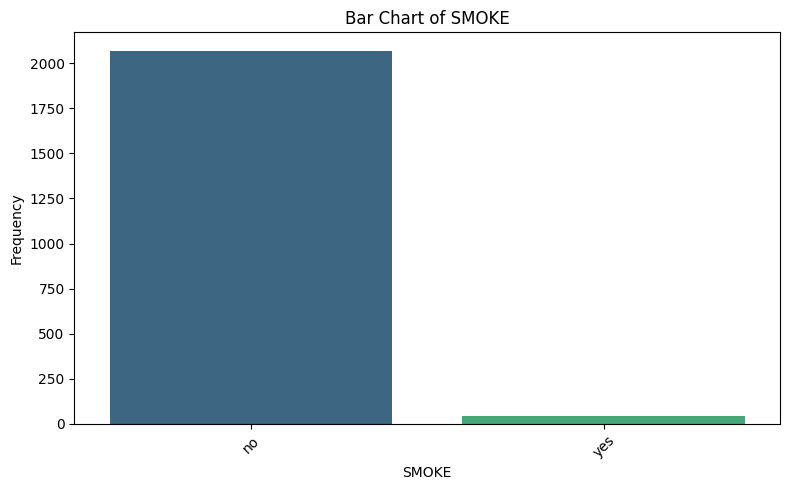

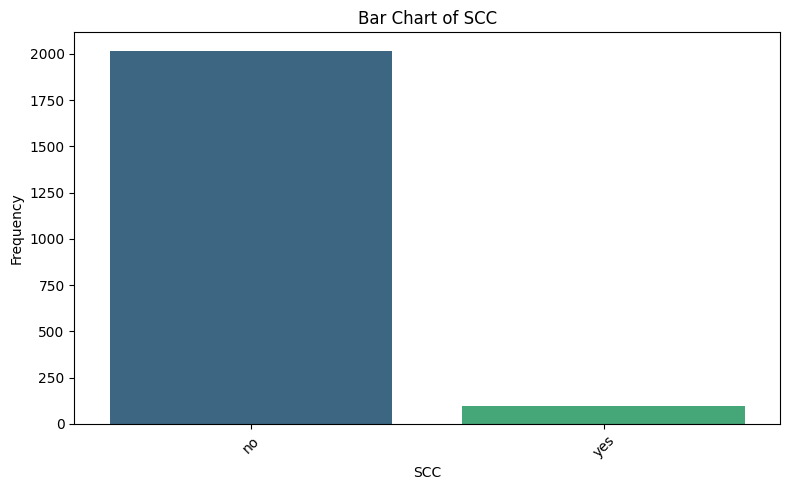

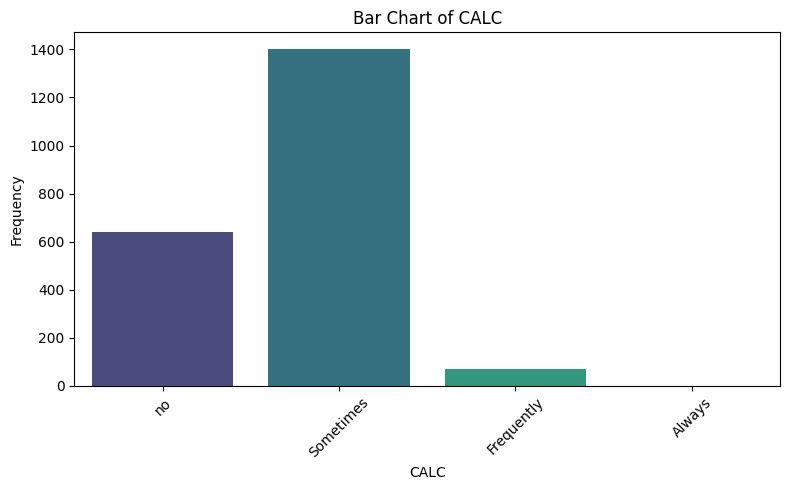

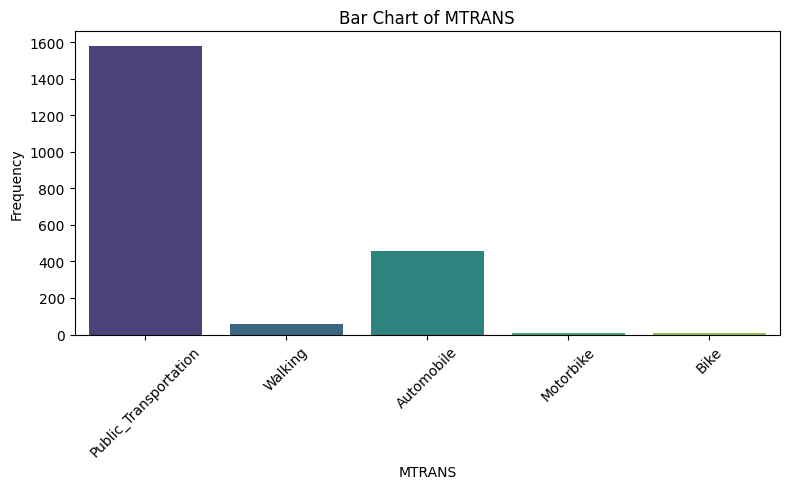

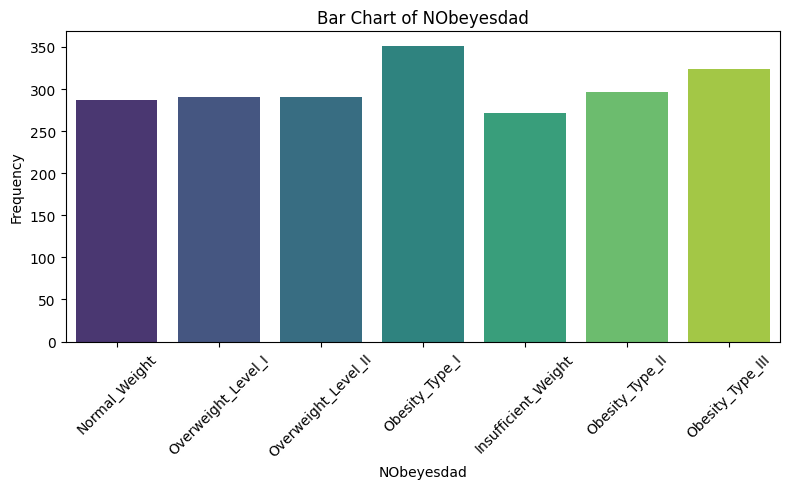

In [11]:
# bar chart for categorical variables

for var in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=var, palette="viridis")
    plt.title(f"Bar Chart of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

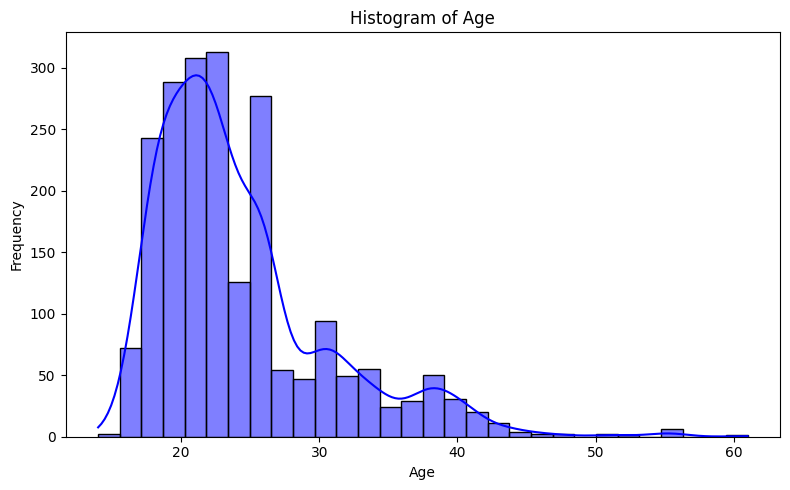

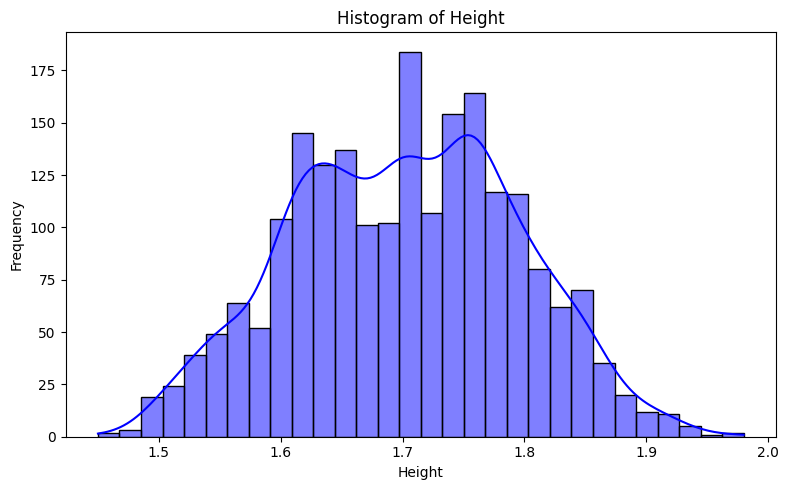

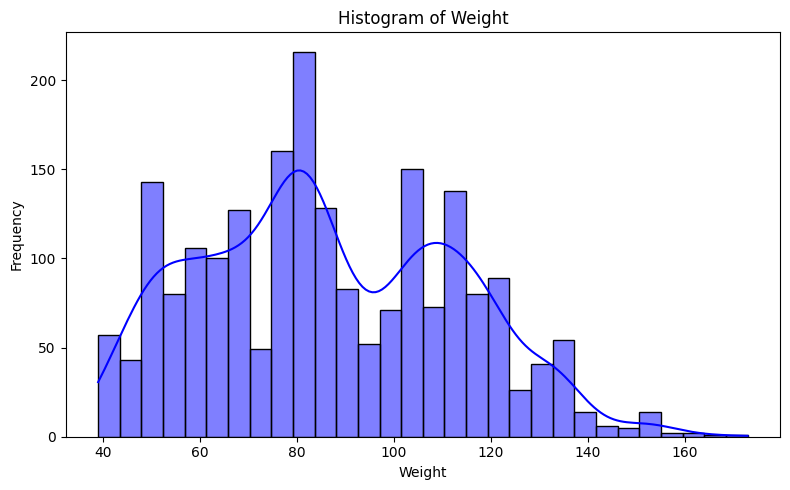

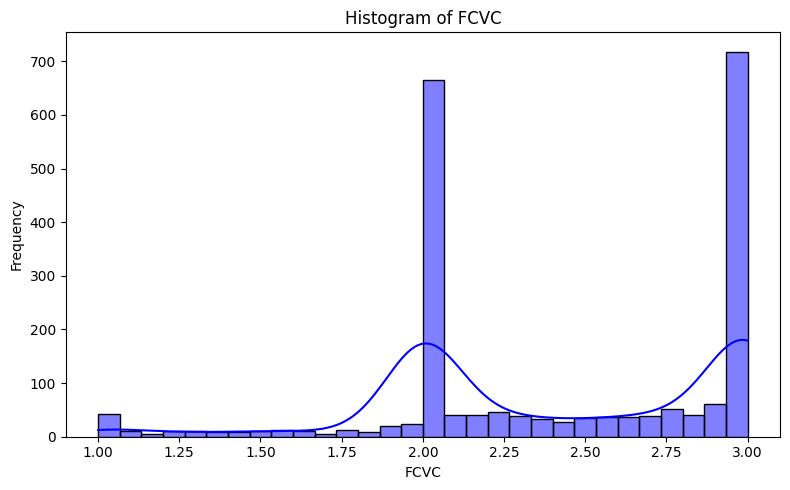

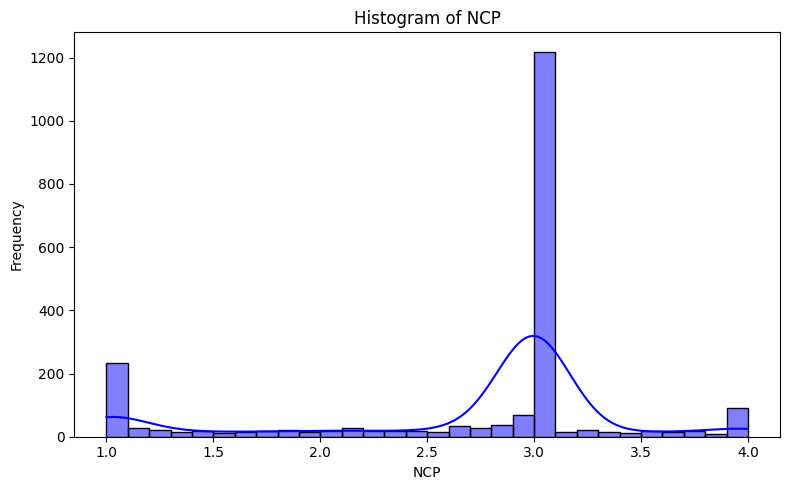

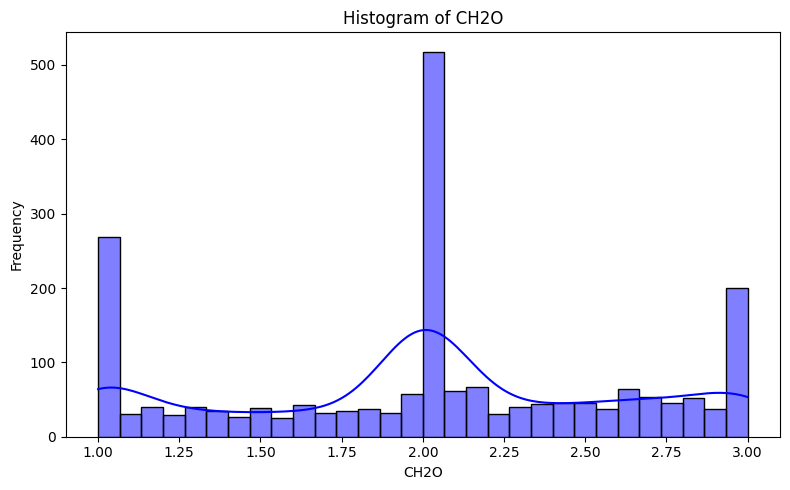

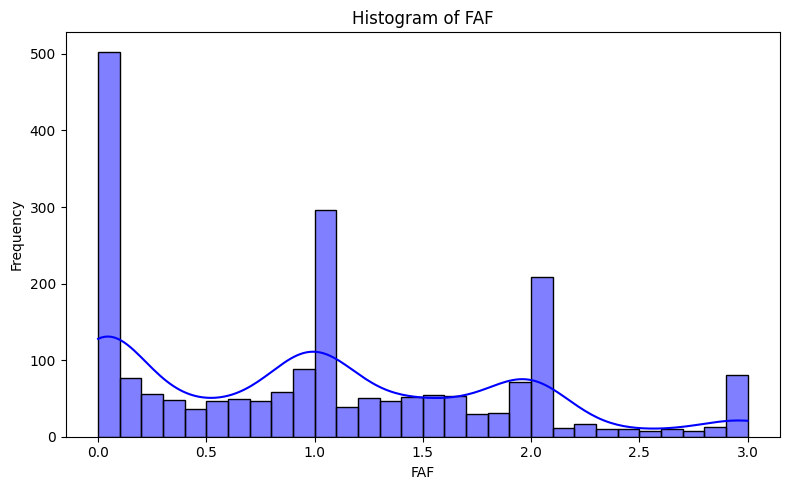

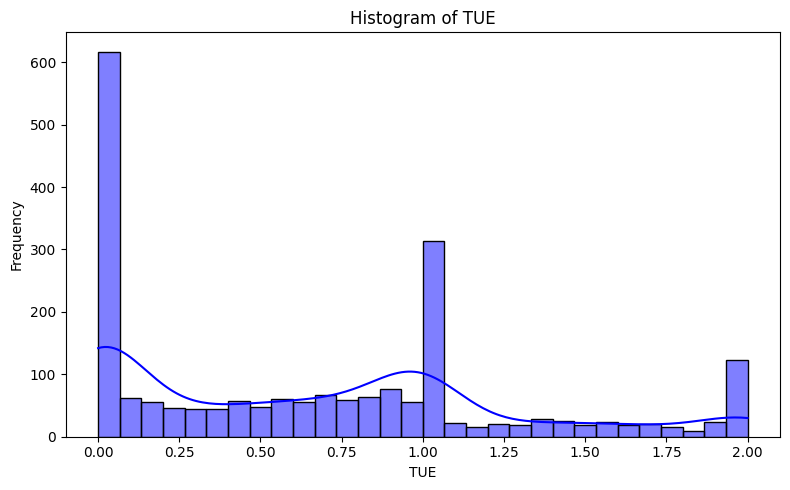

In [12]:
# histogram for numeric variables

for var in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=var, kde=True, color="blue", bins=30)
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

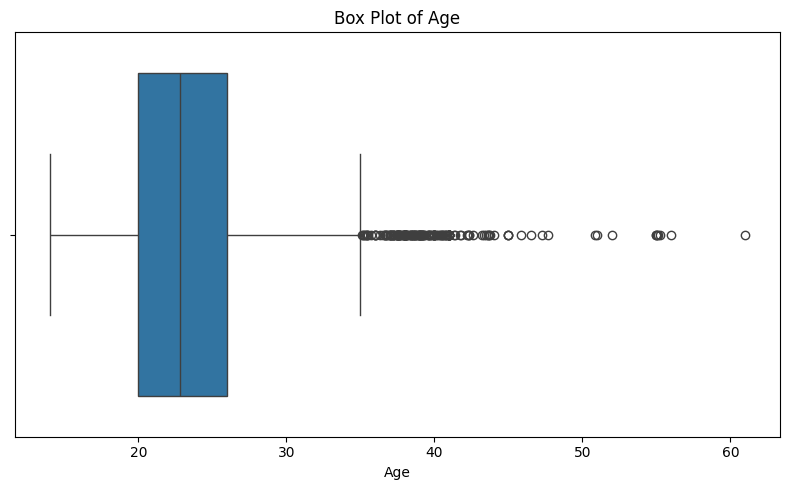

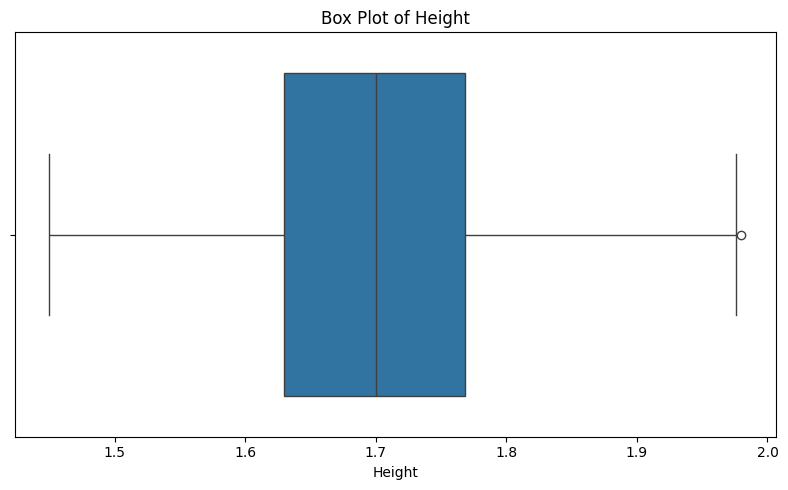

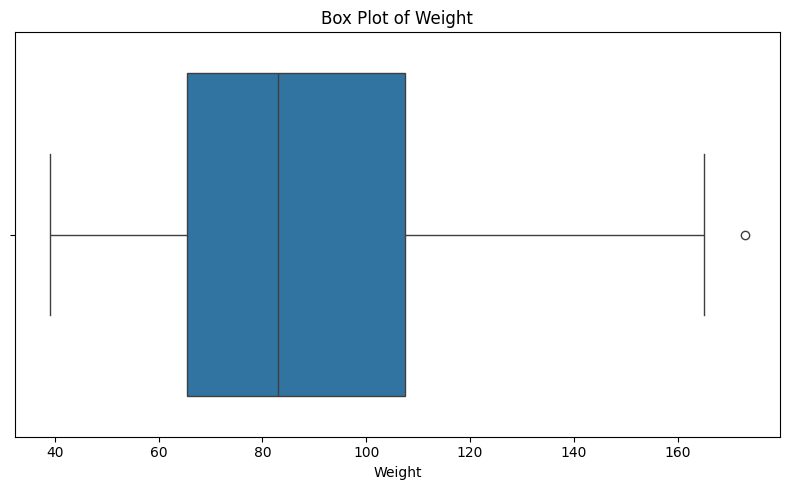

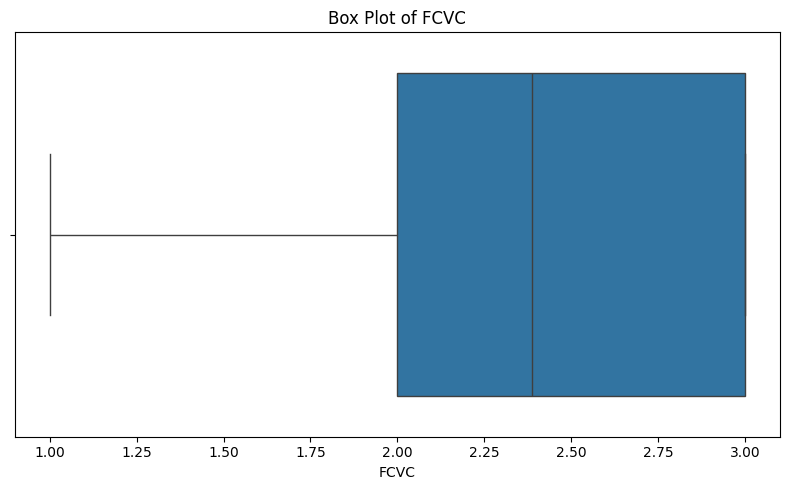

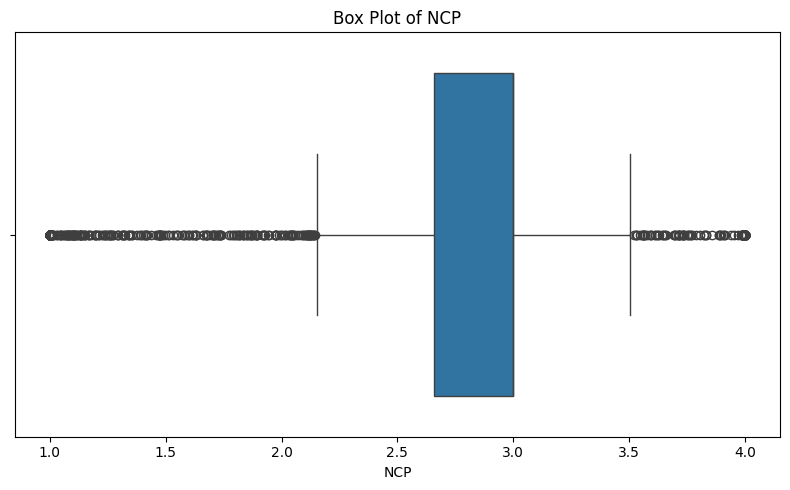

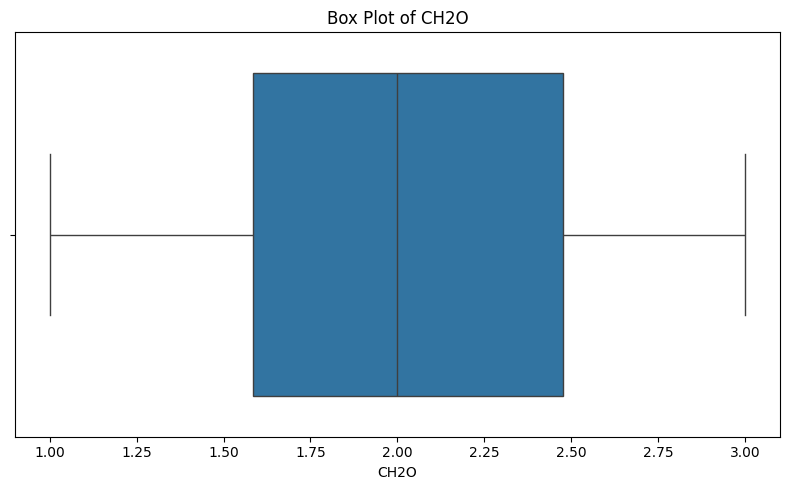

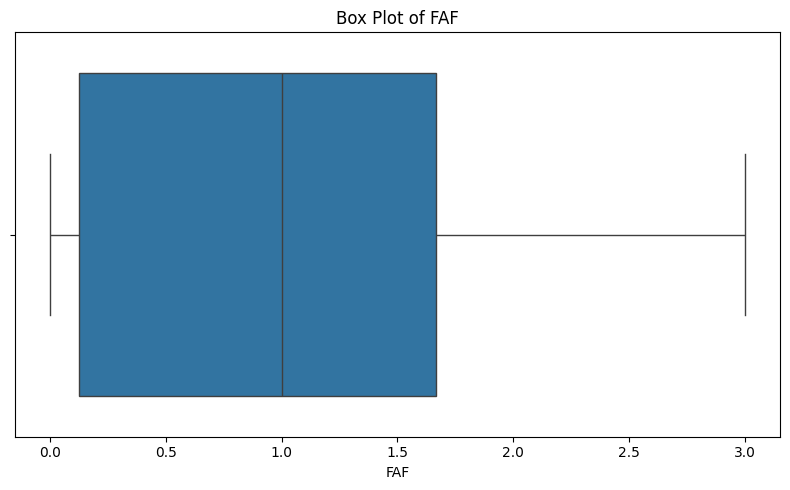

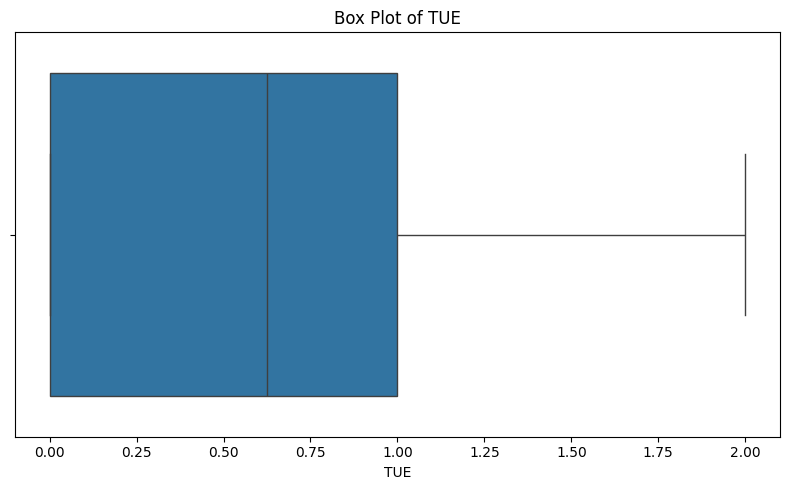

In [13]:
# boxplot for numeric variables

for var in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=var,)
    plt.title(f"Box Plot of {var}")
    plt.xlabel(var)
    plt.tight_layout()
    plt.show()

In [14]:
sns.set(style="whitegrid")

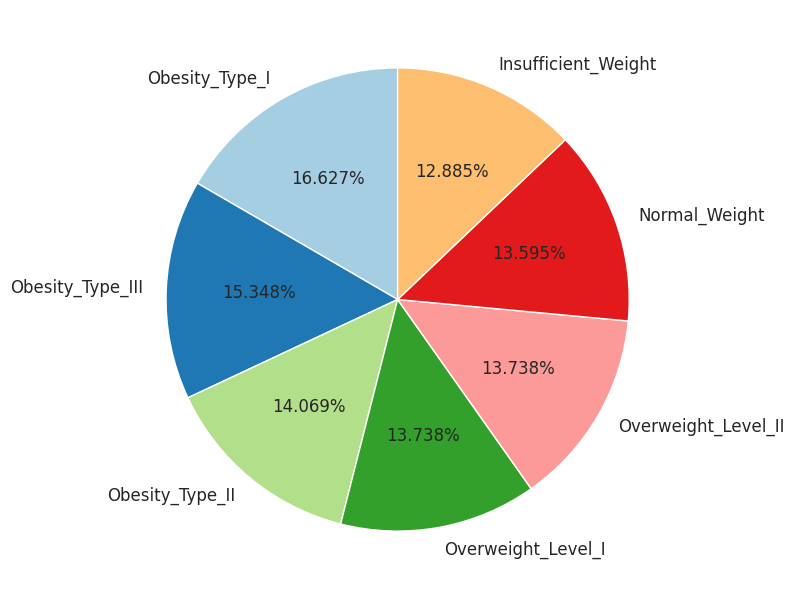

In [15]:
value_counts = df['NObeyesdad'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
value_counts.plot.pie(
    autopct='%.3f%%',
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12},
    startangle=90,
    labels=value_counts.index,
)

plt.ylabel("")
plt.tight_layout()

plt.show()

In [16]:
colors_family_history = ['#8B4513', '#FF8C00']
colors_gender = {'Female': '#8B4513', 'Male': '#FF8C00'}

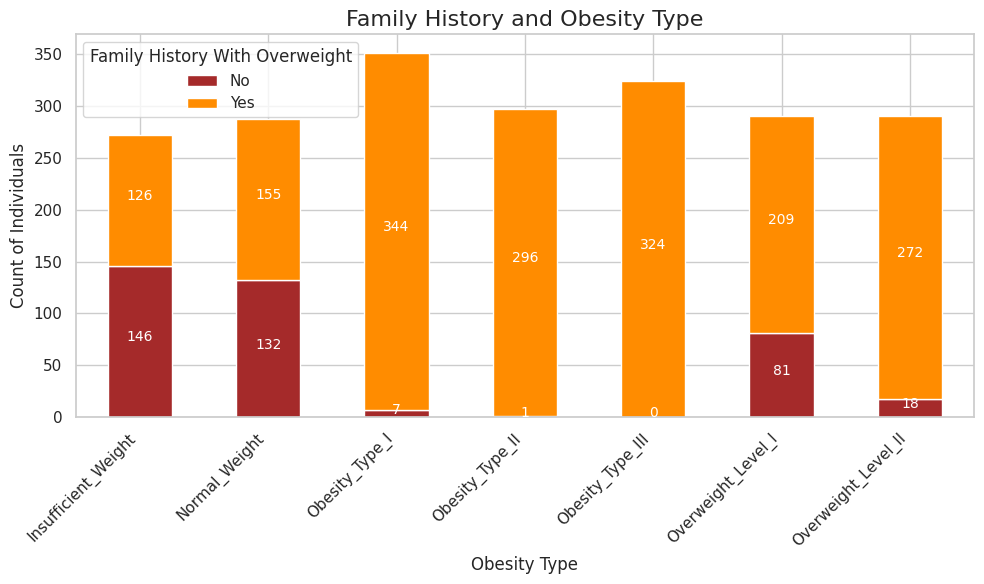

In [17]:
agg_data = df.groupby(['NObeyesdad', 'family_history_with_overweight']).size().reset_index(name='Count')
pivot_data = agg_data.pivot(index='NObeyesdad', columns='family_history_with_overweight', values='Count').fillna(0)
pivot_data.rename(columns={"no": "No", "yes": "Yes"}, inplace=True)

ax = pivot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['brown', 'darkorange']  # Consistent colors
)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.0f', fontsize=10, color='white', padding=3)

plt.title("Family History and Obesity Type", fontsize=16)
plt.xlabel("Obesity Type", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Family History With Overweight", loc="upper left")

plt.tight_layout()
plt.show()

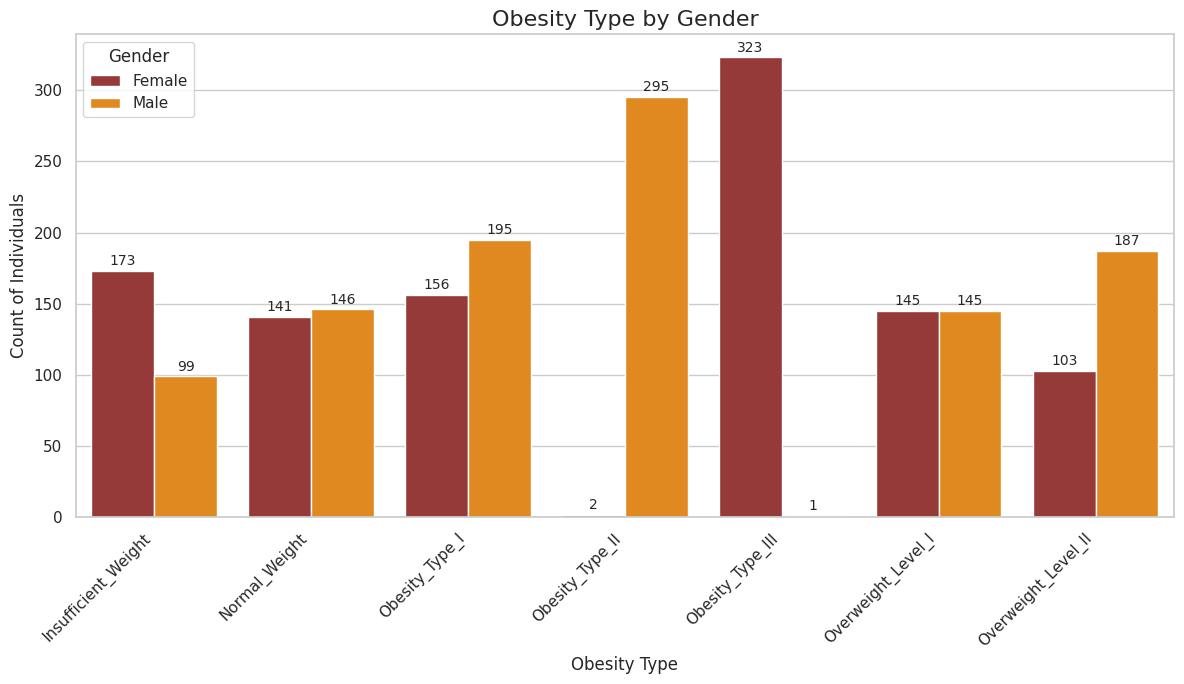

In [18]:
agg_data = df.groupby(['NObeyesdad', 'Gender']).size().reset_index(name='Count')
pivot_data = agg_data.pivot(index='NObeyesdad', columns='Gender', values='Count').fillna(0)
pivot_data = pivot_data.reset_index()

melted_data = pivot_data.melt(id_vars='NObeyesdad', var_name='Gender', value_name='Count')

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_data,
    x='NObeyesdad',
    y='Count',
    hue='Gender',
    palette={'Female': 'brown', 'Male': 'darkorange'}  # Consistent colors
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=2)

plt.title("Obesity Type by Gender", fontsize=16)
plt.xlabel("Obesity Type", fontsize=12)
plt.ylabel("Count of Individuals", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Gender", loc="upper left")

plt.tight_layout()
plt.show()

In [19]:
# Convert categorical variables to numerical

# Gender
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})

# Family_history_with_overweight
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 1, 'yes': 2})

# FAVC
df['FAVC'] = df['FAVC'].map({'no': 1, 'yes': 2})

# CAEC (Consumption of food between meals)
df['CAEC'] = df['CAEC'].map({'no': 1, 'Sometimes': 2, 'Frequently': 3, 'Always': 4})

# SCC (Calories consumption monitoring)
df['SCC'] = df['SCC'].map({'no': 1, 'yes': 2})

# CALC (Consumption of alcohol)
df['CALC'] = df['CALC'].map({'no': 1, 'Sometimes': 2, 'Frequently': 3, 'Always': 4})

# SMOKE
df['SMOKE'] = df['SMOKE'].map({'no': 1, 'yes': 2})

# MTRANS (Transportation used)
map_MTRANS = {'Public_Transportation': 1, 'Walking': 2, 'Automobile': 3, 'Motorbike': 4, 'Bike': 5}

df['MTRANS'] = df['MTRANS'].map(map_MTRANS)

# Target variable (NObeyesdad)
map_target = {'Insufficient_Weight': 1, 'Normal_Weight': 2, 'Overweight_Level_I': 3, 'Overweight_Level_II': 4,
              'Obesity_Type_I': 5, 'Obesity_Type_II': 6, 'Obesity_Type_III': 7}
df['NObeyesdad'] = df['NObeyesdad'].map(map_target)

print(df.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       1  21.0    1.62    64.0                               2     1   2.0   
1       1  21.0    1.52    56.0                               2     1   3.0   
2       2  23.0    1.80    77.0                               2     1   2.0   
3       2  27.0    1.80    87.0                               1     1   3.0   
4       2  22.0    1.78    89.8                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      1   2.0    1  0.0  1.0     1       1           2  
1  3.0     2      2   3.0    2  3.0  0.0     2       1           2  
2  3.0     2      1   2.0    1  2.0  1.0     3       1           2  
3  3.0     2      1   2.0    1  2.0  0.0     3       2           3  
4  1.0     2      1   2.0    1  0.0  0.0     2       1           4  


            Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      1.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       1.000000    14.000000     1.450000    39.000000   
25%       1.000000    19.947192     1.630000    65.473343   
50%       2.000000    22.777890     1.700499    83.000000   
75%       2.000000    26.000000     1.768464   107.430682   
max       2.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         1.817622     1.883941     2.419043     2.685628   
std                          0.386247     0.320371     0.533927     0.778039   
min                          1.000000     1.000000     1.000000     1.000000   
25%                          2.000000     2.000000

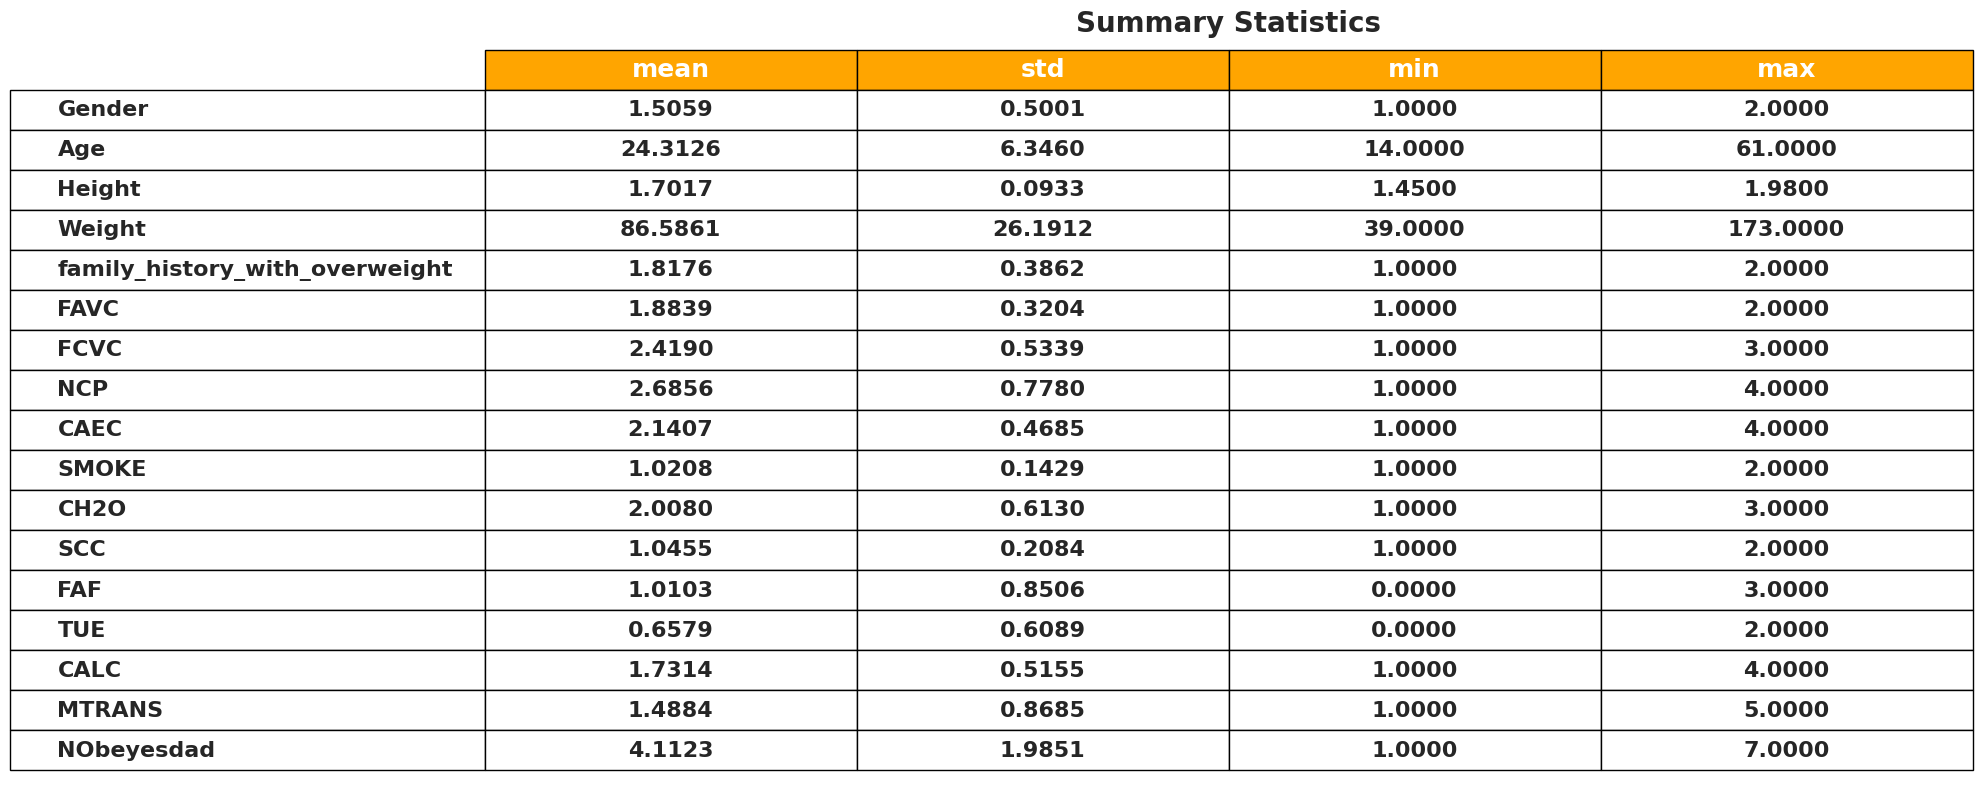

In [20]:
summary_stats = df.describe()
print(summary_stats)

categorical_columns = df.select_dtypes(include=['category', 'object']).columns
if len(categorical_columns) > 0:
    print(df[categorical_columns].describe())

summary_stats = df.describe(percentiles=[], include='all').transpose()

summary_stats = summary_stats.drop(columns=['count', '50%'])

summary_stats = summary_stats.applymap(lambda x: f'{x:.4f}' if isinstance(x, (int, float)) else x)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=summary_stats.values,
                 colLabels=summary_stats.columns,
                 rowLabels=summary_stats.index,
                 cellLoc='center',
                 loc='center',
                 colColours=['#FFA500']*len(summary_stats.columns))

table.auto_set_font_size(False)
table.set_fontsize(16)

table.scale(1.2, 2.5)

for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_text_props(weight='bold')
    if key[0] == 0:
        cell.set_fontsize(18)
        cell.set_text_props(color='white')
    else:
        cell.set_fontsize(16)

plt.subplots_adjust(top=0.85)

plt.title('Summary Statistics', fontsize=20, weight='bold')  # Title with larger font size

plt.show()

In [21]:
columns_to_floor = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[columns_to_floor] = df[columns_to_floor].apply(np.floor)

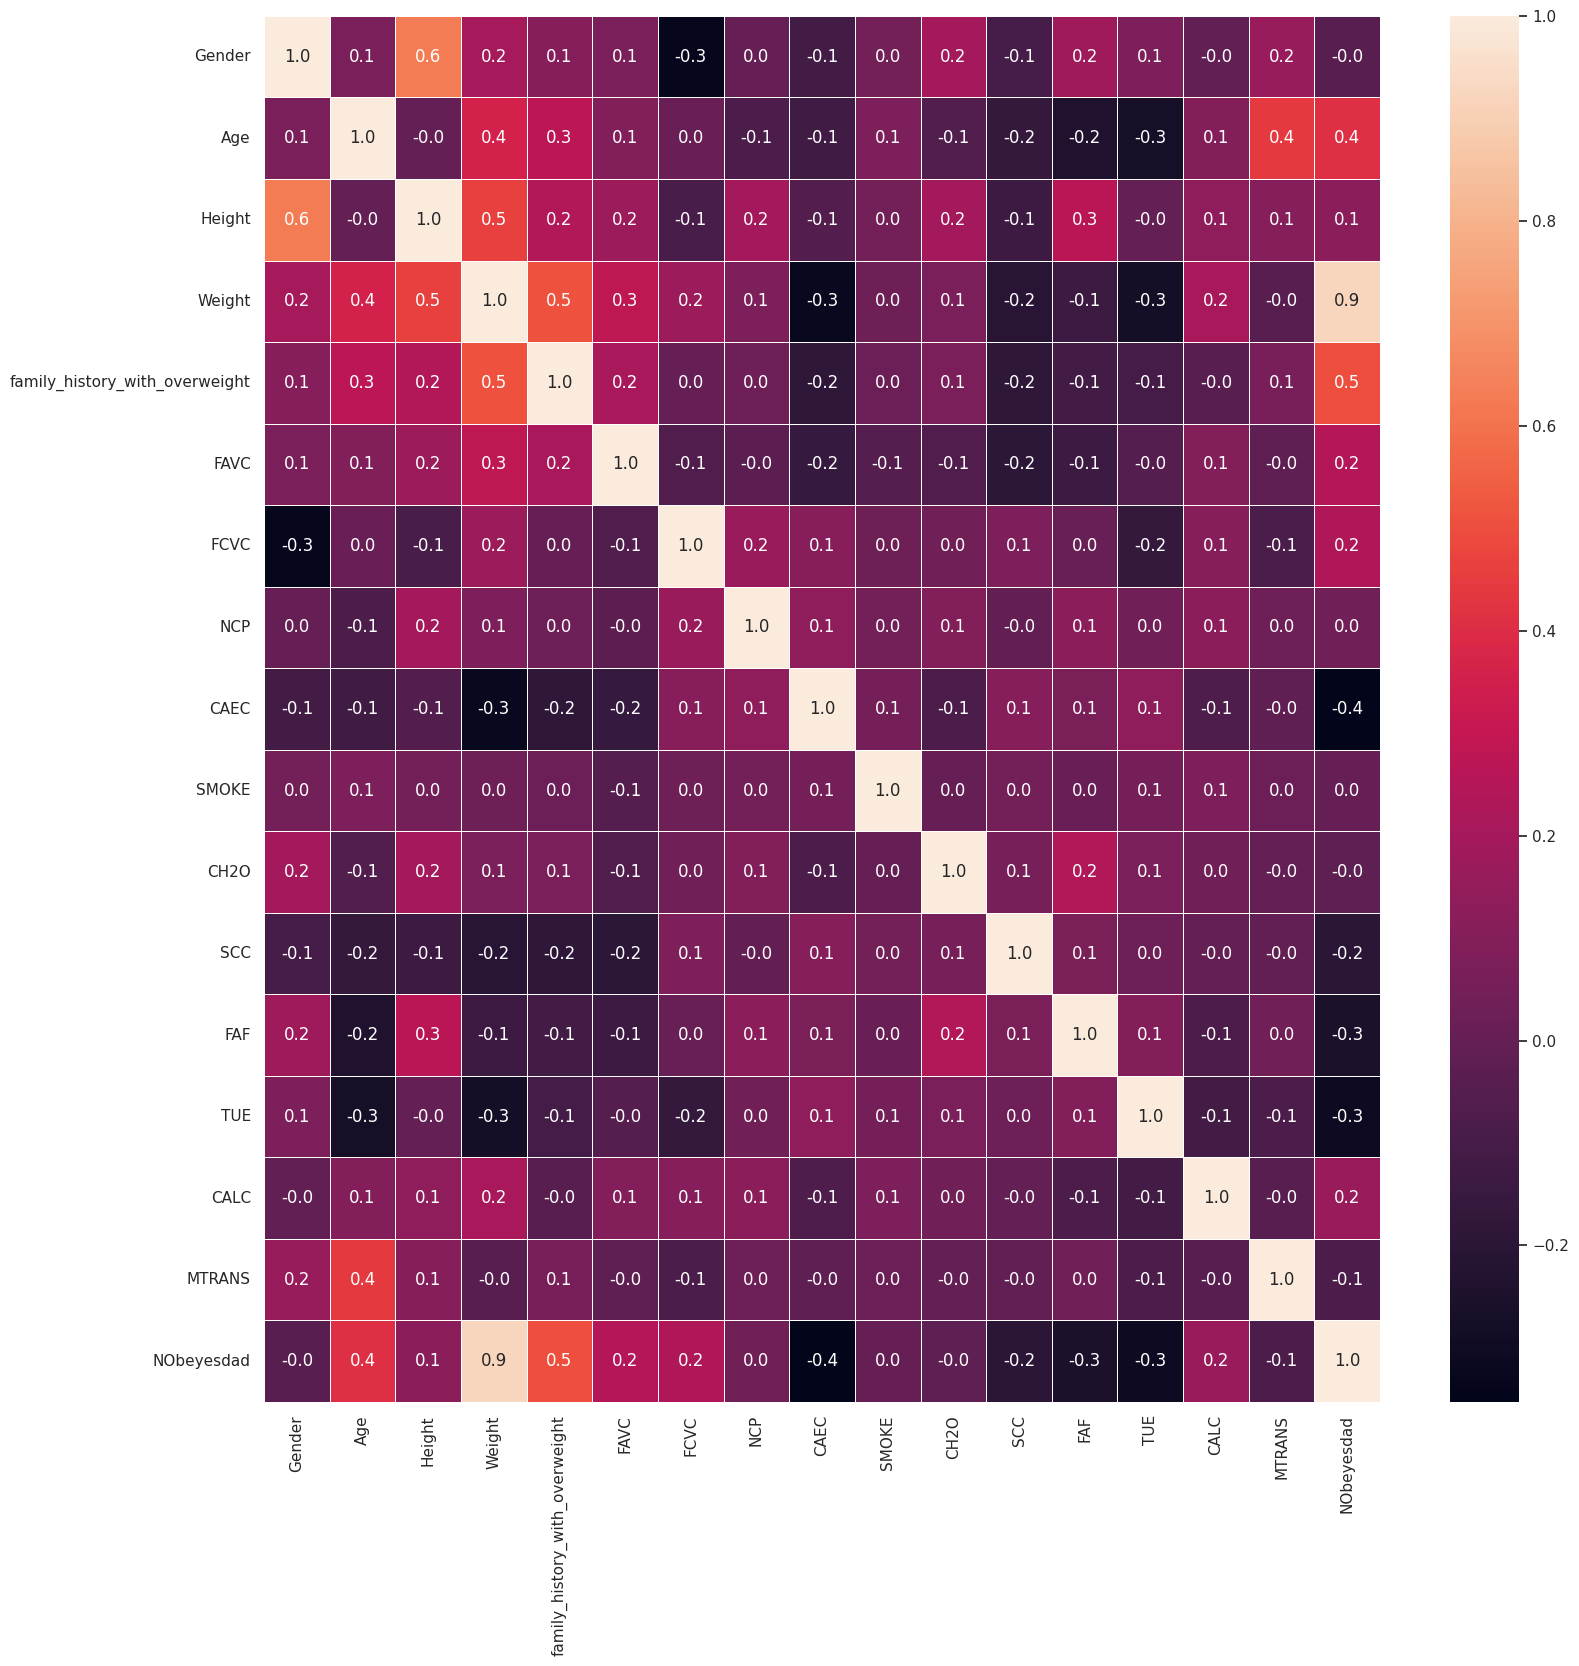

In [22]:
corr = df.corr(method = 'spearman')

f,ax = plt.subplots(figsize=(18, 18))
sns_plot = sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# Save the plot
f.savefig("correlation.png")

In [23]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Height'] = scaler.fit_transform(df[['Height']])
df['Weight'] = scaler.fit_transform(df[['Weight']])

In [24]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,-0.522124,-0.875589,-0.862558,2,1,2.0,3.0,2,1,2.0,1,0.0,1.0,1,1,2
1,1,-0.522124,-1.947599,-1.168077,2,1,3.0,3.0,2,2,3.0,2,3.0,0.0,2,1,2
2,2,-0.206889,1.054029,-0.366090,2,1,2.0,3.0,2,1,2.0,1,2.0,1.0,3,1,2
3,2,0.423582,1.054029,0.015808,1,1,3.0,3.0,2,1,2.0,1,2.0,0.0,3,2,3
4,2,-0.364507,0.839627,0.122740,1,1,2.0,1.0,2,1,2.0,1,0.0,0.0,2,1,4
5,2,0.738817,-0.875589,-1.282647,1,2,2.0,3.0,2,1,2.0,1,0.0,0.0,2,3,2
6,1,-0.206889,-2.162001,-1.206267,2,2,3.0,3.0,2,1,2.0,1,1.0,0.0,2,4,2
7,2,-0.364507,-0.661187,-1.282647,1,1,2.0,3.0,2,1,2.0,1,3.0,0.0,2,1,2
8,2,-0.049271,0.839627,-0.862558,2,2,3.0,3.0,2,1,2.0,1,1.0,1.0,3,1,2
9,2,-0.364507,0.196421,-0.709799,2,2,2.0,3.0,2,1,2.0,1,1.0,1.0,1,1,2


## Assumptions

In [25]:
# Multicollinearity

In [26]:
continuous_vars = ['Age', 'Height', 'Weight']

In [27]:
predictors = df[continuous_vars]

vif_data = pd.DataFrame()
vif_data["Variable"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data)

  Variable       VIF
0      Age  1.063030
1   Height  1.297781
2   Weight  1.352396


## Data Modelling

In [28]:
numerical_columns = ['Age', 'Weight', 'Height']

# Convert all other columns to 'category'
for col in df.columns:
    if col not in numerical_columns:
        df[col] = df[col].astype('category')

print(df.dtypes)

Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                              category
NCP                               category
CAEC                              category
SMOKE                             category
CH2O                              category
SCC                               category
FAF                               category
TUE                               category
CALC                              category
MTRANS                            category
NObeyesdad                        category
dtype: object


In [29]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
# Helper function: calculate log-likelihood
def calculate_log_likelihood(X, y, model):
    probabilities = model.predict_proba(X)
    y_codes = y.cat.codes
    log_likelihood = np.sum(np.log(probabilities[np.arange(len(y)), y_codes]))
    return log_likelihood

# Helper function: calculate AIC and BIC
def calculate_aic_bic(log_likelihood, n_parameters, n_samples):
    aic = -2 * log_likelihood + 2 * n_parameters
    bic = -2 * log_likelihood + n_parameters * np.log(n_samples)
    return aic, bic

# Forward selection
def forward_selection(X, y):
    remaining_features = list(X.columns)
    selected_features = []
    best_aic = np.inf
    results = []

    while remaining_features:
        aic_values = []
        for feature in remaining_features:
            trial_features = selected_features + [feature]
            model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
            model.fit(X[trial_features], y)
            log_likelihood = calculate_log_likelihood(X[trial_features], y, model)
            n_parameters = len(model.coef_.ravel()) + len(model.intercept_)
            aic, _ = calculate_aic_bic(log_likelihood, n_parameters, len(y))
            aic_values.append((feature, aic))

        # Select feature with lowest AIC
        best_feature, feature_aic = min(aic_values, key=lambda x: x[1])
        if feature_aic < best_aic:
            best_aic = feature_aic
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            results.append((best_aic, selected_features.copy()))
        else:
            break

    return results

# Backward elimination
def backward_elimination(X, y):
    selected_features = list(X.columns)
    best_aic = np.inf
    results = []

    while len(selected_features) > 1:
        aic_values = []
        for feature in selected_features:
            trial_features = [f for f in selected_features if f != feature]
            model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
            model.fit(X[trial_features], y)
            log_likelihood = calculate_log_likelihood(X[trial_features], y, model)
            n_parameters = len(model.coef_.ravel()) + len(model.intercept_)
            aic, _ = calculate_aic_bic(log_likelihood, n_parameters, len(y))
            aic_values.append((feature, aic))

        # Remove feature with lowest AIC increase
        worst_feature, feature_aic = min(aic_values, key=lambda x: x[1])
        if feature_aic < best_aic:
            best_aic = feature_aic
            selected_features.remove(worst_feature)
            results.append((best_aic, selected_features.copy()))
        else:
            break

    return results

In [32]:
# Perform forward selection
forward_results = forward_selection(X_train, y_train)
print("Forward Selection Results:")
for aic, features in forward_results:
    print(f"AIC: {aic}, Features: {features}")

Forward Selection Results:
AIC: 3251.7930646585282, Features: ['Weight']
AIC: 1849.4373878522413, Features: ['Weight', 'Height']
AIC: 1619.4835105116404, Features: ['Weight', 'Height', 'Gender']
AIC: 1585.5100403114675, Features: ['Weight', 'Height', 'Gender', 'FCVC']
AIC: 1555.3284251575587, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC']
AIC: 1526.7118510862238, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age']
AIC: 1504.4582917110022, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF']
AIC: 1493.8022449390405, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF', 'TUE']
AIC: 1483.566251598223, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF', 'TUE', 'CAEC']
AIC: 1476.1666645876635, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF', 'TUE', 'CAEC', 'family_history_with_overweight']
AIC: 1471.3916412624194, Features: ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF', 'TUE', 'CA

In [33]:
# Perform backward elimination
backward_results = backward_elimination(X_train, y_train)
print("\nBackward Elimination Results:")
for aic, features in backward_results:
    print(f"AIC: {aic}, Features: {features}")


Backward Elimination Results:
AIC: 1478.2874375445163, Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
AIC: 1471.5467903563058, Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS']
AIC: 1465.16789845186, Features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [34]:
best_forward_features = forward_results[-1][1]  # Features in the last iteration (lowest AIC)
print("Selected Features (Forward):", best_forward_features)

Selected Features (Forward): ['Weight', 'Height', 'Gender', 'FCVC', 'FAVC', 'Age', 'FAF', 'TUE', 'CAEC', 'family_history_with_overweight', 'CALC', 'MTRANS', 'NCP']


In [35]:
best_backward_features = backward_results[-1][1]  # Features in the last iteration (lowest AIC)
print("Selected Features (Backward):", best_backward_features)

Selected Features (Backward): ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [36]:
final_features = best_backward_features
final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
final_model.fit(X_train[final_features], y_train)

test_log_likelihood = calculate_log_likelihood(X_test[final_features], y_test, final_model)
n_parameters = len(final_model.coef_.ravel()) + len(final_model.intercept_)
test_aic, test_bic = calculate_aic_bic(test_log_likelihood, n_parameters, len(y_test))

print(f"Final Model - Test AIC: {test_aic}, Test BIC: {test_bic}")

Final Model - Test AIC: 663.2201745018912, Test BIC: 1081.591610305105


In [37]:
# Extract coefficients for each class
feature_coefficients = pd.DataFrame(
    final_model.coef_,
    columns=final_features,
    index=[f"Class {cls}" for cls in final_model.classes_]
)

print("Coefficients for each class:")
print(feature_coefficients)

Coefficients for each class:
           Gender       Age    Height     Weight  \
Class 1 -0.488947 -0.827906  3.363923 -11.766708   
Class 2  0.519100 -0.234974  1.527095  -6.233123   
Class 3 -0.279112 -0.381443  1.015564  -2.926498   
Class 4  0.867619  0.427235  0.236629  -0.096224   
Class 5 -0.322701 -0.071910 -1.528454   4.648167   
Class 6  2.992500  1.217231 -2.756196   9.631980   
Class 7 -3.288459 -0.128234 -1.858561   6.742407   

         family_history_with_overweight      FAVC      FCVC       NCP  \
Class 1                       -0.692828 -0.077782 -0.167323 -0.072652   
Class 2                       -0.841207 -0.327333  0.238335  0.163784   
Class 3                       -0.561631  0.528624 -0.604010 -0.136014   
Class 4                        0.732996 -1.253337 -0.249513 -0.329075   
Class 5                        0.744069  0.822106 -0.651296 -0.254661   
Class 6                        0.096456 -0.190724 -1.233267 -0.580724   
Class 7                        0.522146  0.

In [38]:
predictions = final_model.predict(X_test[final_features])
probabilities = final_model.predict_proba(X_test[final_features])

print("Predictions:", predictions)

Predictions: [1 7 1 1 2 1 6 3 5 1 5 7 6 6 7 5 7 6 5 4 5 3 7 5 1 4 4 7 7 1 7 4 3 2 1 7 5
 2 2 2 1 6 3 2 3 1 6 2 5 6 2 1 2 3 1 4 6 6 2 6 2 7 4 1 6 5 2 7 1 1 4 4 1 1
 4 6 6 3 7 6 2 5 6 6 5 5 3 3 2 4 2 6 1 4 5 1 2 5 3 6 5 5 7 5 4 5 2 7 7 6 5
 3 4 2 1 5 5 6 4 3 7 6 5 3 2 6 5 5 7 6 7 6 2 5 3 7 1 7 3 5 4 3 1 1 1 6 6 7
 1 5 1 1 2 6 5 3 4 4 1 1 3 1 5 1 6 1 5 3 3 4 2 4 6 7 5 4 5 4 5 3 1 6 1 3 6
 5 3 7 6 6 1 7 1 2 7 2 6 5 7 1 6 6 7 7 2 7 3 3 5 7 3 5 1 5 6 1 3 6 6 6 7 4
 6 3 6 4 1 7 3 4 3 7 2 3 2 5 5 5 6 1 4 4 3 5 5 5 2 5 5 1 3 5 1 4 2 4 5 6 5
 5 7 7 3 5 5 7 7 2 3 7 6 7 4 5 6 5 6 7 6 1 1 3 4 7 7 3 5 4 1 6 6 3 1 6 1 3
 6 6 4 4 2 3 1 1 3 4 4 3 4 7 3 6 2 7 4 4 5 7 4 2 1 3 7 1 2 7 5 5 7 1 2 2 6
 7 6 3 5 1 1 1 5 7 3 5 7 6 3 5 3 4 4 7 4 2 1 4 4 4 3 4 4 6 5 6 6 7 5 4 3 7
 1 5 2 6 5 3 1 2 5 5 4 4 3 1 7 3 7 7 2 4 6 3 7 5 6 3 1 7 2 7 2 1 2 3 5 1 1
 7 2 7 4 4 3 3 7 1 2 5 3 6 1 6 4 2 7 5 1 5 6 5 4 7 1 6 4 7 1 5 7 1 5 6 2 5
 6 7 3 3 7 4 3 6 4 3 6 6 3 4 7 3 3 4 6 6 7 6 6 6 3 5 6 3 2 6 5 2 2 5 6 6 5
 2 1 3 3 4 7

In [39]:
print("Class Probabilities:", probabilities)

Class Probabilities: [[7.98808808e-01 1.99207882e-01 1.83919279e-03 ... 7.97449988e-07
  1.28166541e-13 7.61217209e-12]
 [4.74697310e-15 1.03340164e-09 6.01802249e-07 ... 1.01990497e-02
  7.56225366e-03 9.82214036e-01]
 [8.31382983e-01 1.57089293e-01 1.14590216e-02 ... 1.21454106e-07
  6.59340736e-14 1.77133591e-10]
 ...
 [6.72834223e-01 3.22939164e-01 4.07403558e-03 ... 1.16932848e-07
  4.28284349e-13 6.76841986e-09]
 [3.47643637e-01 6.33744524e-01 1.71962641e-02 ... 2.39837853e-06
  2.52755118e-10 3.32480516e-06]
 [7.33350920e-14 1.35565119e-08 1.55232074e-05 ... 6.23027833e-02
  9.35771353e-01 1.10005638e-03]]


In [42]:
y_train_pred = final_model.predict(X_train[final_features])
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))


Training Set Performance:
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       204
           2       0.91      0.79      0.85       209
           3       0.78      0.83      0.81       219
           4       0.82      0.80      0.81       227
           5       0.95      0.95      0.95       257
           6       0.98      0.99      0.99       222
           7       1.00      1.00      1.00       245

    accuracy                           0.91      1583
   macro avg       0.91      0.91      0.91      1583
weighted avg       0.91      0.91      0.91      1583



In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.8636363636363636
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.99      0.90        68
           2       0.83      0.62      0.71        78
           3       0.70      0.73      0.72        71
           4       0.79      0.83      0.81        63
           5       0.97      0.89      0.93        94
           6       0.89      1.00      0.94        75
           7       1.00      0.99      0.99        79

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.87      0.86      0.86       528

Confusion Matrix:
 [[67  1  0  0  0  0  0]
 [14 48 14  2  0  0  0]
 [ 0  9 52 10  0  0  0]
 [ 0  0  8 52  3  0  0]
 [ 0  0  0  2 84  8  0]
 [ 0  0  0  0  0 75  0]
 [ 0  0  0  0  0  1 78]]


In [43]:
# Evaluate Model on Training Set
y_train_pred = final_model.predict(X_train[final_features])
print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

# Evaluate Model on Test Set
y_test_pred = final_model.predict(X_test[final_features])
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Training Set Performance:
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       204
           2       0.91      0.79      0.85       209
           3       0.78      0.83      0.81       219
           4       0.82      0.80      0.81       227
           5       0.95      0.95      0.95       257
           6       0.98      0.99      0.99       222
           7       1.00      1.00      1.00       245

    accuracy                           0.91      1583
   macro avg       0.91      0.91      0.91      1583
weighted avg       0.91      0.91      0.91      1583

Test Set Performance:
              precision    recall  f1-score   support

           1       0.83      0.99      0.90        68
           2       0.83      0.62      0.71        78
           3       0.70      0.73      0.72        71
           4       0.79      0.83      0.81        63
           5       0.97      0.89      0.93        94
           6       0.89      1